In [66]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [67]:
# Load the data set
train_data = pd.read_csv('C:/Users/USER\Desktop/ML/Melanoma TFRecords 256x256.csv')
print(train_data.shape)
train_data.head()

(33126, 12)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,2
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,3
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,4


In [74]:
len(train_data['target'].unique())

2

In [69]:
# Handling missing values
train_data.isnull().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
patient_code                       0
dtype: int64

In [70]:
# As there are some null values we will habdle those
# Dropping rows 
print('Shape before dropping rows -- ', train_data.shape)
train_data = train_data.dropna(axis=0, subset = ["sex","age_approx"])
# Dropping the patient_id column and image_name as it is not an important feature for the model to learn
train_data = train_data.drop(["image_name","patient_id"],axis=1)
print('Shape after dropping rows -- ', train_data.shape)

Shape before dropping rows --  (33126, 12)
Shape after dropping rows --  (33058, 10)


In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33058 entries, 0 to 33125
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sex                            33058 non-null  object 
 1   age_approx                     33058 non-null  float64
 2   anatom_site_general_challenge  32531 non-null  object 
 3   diagnosis                      33058 non-null  object 
 4   benign_malignant               33058 non-null  object 
 5   target                         33058 non-null  int64  
 6   tfrecord                       33058 non-null  int64  
 7   width                          33058 non-null  int64  
 8   height                         33058 non-null  int64  
 9   patient_code                   33058 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 2.8+ MB


In [73]:
# Imputing missing values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
impute.fit(train_data[["anatom_site_general_challenge"]])
train_data["anatom_site_general_challenge"] = impute.transform(train_data[["anatom_site_general_challenge"]]).ravel() # Data is converted to 1D Array as it is a single column   

train_data.isnull().sum()

sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
benign_malignant                 0
target                           0
tfrecord                         0
width                            0
height                           0
patient_code                     0
dtype: int64

In [78]:
# One hot encoding 
train_data = pd.get_dummies(train_data,drop_first=True)
train_data.shape

(33058, 21)

In [79]:
test_data = pd.DataFrame(train_data['target'])
test_data

,target
0,0
1,0
2,0
3,0
4,0
...,...
33121,0
33122,0
33123,0
33124,0


In [80]:
train_data = train_data.drop(['target'], axis=1)
train_data.shape

(33058, 20)

In [81]:
# Split the data for train and testing
from sklearn.model_selection import train_test_split
#Stratified data splitting
X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size = 0.25, random_state=42, stratify = test_data)

In [90]:
# Train the model
# Using decision tree classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier  
model_1 = DecisionTreeClassifier(criterion='entropy', random_state=0)  # criterion='entropy' is used to minimize the dataset's impurity
model_1.fit(X_train, y_train)
# Prediction
y_pred = model_1.predict(X_test)

accuracyModel_1 = accuracy_score(y_test, y_pred)
print(accuracyModel_1)

1.0


In [ ]:
# Scale the data

In [92]:
# Using logistic regression
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression(random_state=42)
model_2.fit(X_train, y_train.values.ravel())

y_pred_2 = model_2.predict(X_test)

accuracyModel_2 = accuracy_score(y_test, y_pred_2)
print(accuracyModel_2)

# The warning occurs as data is not scaled 

1.0


D:\Installation\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


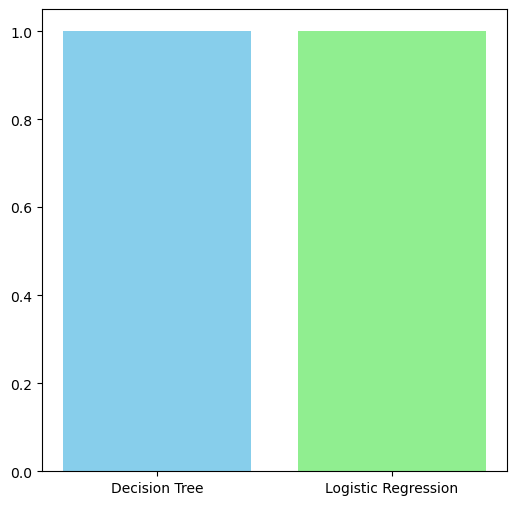

In [97]:
# Plot the comparison
import matplotlib.pyplot as plt
# Names of the models
models = ['Decision Tree', 'Logistic Regression']
# Accuracy values
accuracies = [accuracyModel_1, accuracyModel_2]

# Create bar chart
plt.figure(figsize=(6, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])

# Add title and labels
# plt.title('Comparison of Model Accuracies')
# plt.xlabel('Models')
# plt.ylabel('Accuracy')

plt.show()
